In [75]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
def normalize(img):
    for c in range(img.shape[2]):
        max = 0
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if max < img[i][j][c]:
                    max = img[i][j][c]
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                img[i][j][c] = np.uint8(round(img[i][j][c] / max * 255))
    return img

def detector_max(himg):
    size = himg.shape[0]
    channels = himg.shape[2]
    max = 0
    a = 0
    maxx = 0
    maxy = 0
    for i in range(size):
        for j in range(size):
            a = 0
            for c in range(channels):
                a += himg[i][j][c]
            if (a > max):
                max = a
                maxx = i
                maxy= j
    return maxx, maxy

def detector_min(himg):
    size = himg.shape[0]
    channels = himg.shape[2]
    min = 255 * 3
    a = 0
    minx = 0
    miny = 0
    for i in range(size):
        for j in range(size):
            a = 0
            for c in range(channels):
                a += himg[i][j][c]
            if (a < min):
                min = a
                minx = i
                miny= j
    return minx, miny

In [116]:
def FHT_vert_r(img):
    height = img.shape[0]
    length = img.shape[1]
    channels = img.shape[2]
    
    hough_Img = np.array([ [ [0] * channels for i in range(length)] for j in range(height)])
    if(length == 1):
        return img
    left = []
    right = []
    for i in range(height):
        left.append(img[i][:(length // 2)])
        right.append(img[i][(length // 2):])
    left = FHT_vert_r(np.array(left))
    right = FHT_vert_r(np.array(right))
    for ch in range(channels):
        for i in range(0, length, 2):
            shift = i // 2
            for j in range(height):
                index = (j + shift) % height
                hough_Img[j][i][ch] = int(left[j][i // 2][ch]) + int(right[index][i // 2][ch])
                index = (j + shift + 1) % height
                hough_Img[j][i + 1][ch] = int(left[j][i // 2][ch]) + int(right[index][i // 2][ch])
    return hough_Img

def FHT_vert_l(img):
    height = img.shape[0]
    length = img.shape[1]
    channels = img.shape[2]
    
    hough_Img = np.array([ [ [0] * channels for i in range(length)] for j in range(height)])
    if(length == 1):
        return img
    left = []
    right = []
    for i in range(height):
        left.append(img[i][:(length // 2)])
        right.append(img[i][(length // 2):])
    left = FHT_vert_l(np.array(left))
    right = FHT_vert_l(np.array(right))
    for ch in range(channels):
        for i in range(0, length, 2):
            shift = i // 2
            for j in range(height):
                index = (j - shift) % height
                hough_Img[j][i][ch] = int(left[j][i // 2][ch]) + int(right[index][i // 2][ch])
                index = (j - shift - 1) % height
                hough_Img[j][i + 1][ch] = int(left[j][i // 2][ch]) + int(right[index][i // 2][ch])
    return hough_Img

def FHT_horiz_dwn(img):
    height = img.shape[0]
    length = img.shape[1]
    channels = img.shape[2]
    
    hough_Img = np.array([ [ [0] * channels for i in range(length)] for j in range(height)])
    if(height == 1):
        return img
    up = img[:(height // 2)]
    down = img[(height // 2):]
    up = FHT_horiz_dwn(np.array(up))
    down = FHT_horiz_dwn(np.array(down))
    for ch in range(channels):
        for i in range(0, height, 2):
            shift = i // 2
            for j in range(length):
                index = (j - shift) % length
                hough_Img[i][j][ch] = int(up[i // 2][j][ch]) + int(down[i // 2][index][ch])
                index = (j - shift - 1) % length
                hough_Img[i + 1][j][ch] = int(up[i // 2][j][ch]) + int(down[i // 2][index][ch])
    return hough_Img

def FHT_horiz_up(img):
    height = img.shape[0]
    length = img.shape[1]
    channels = img.shape[2]
    
    hough_Img = np.array([ [ [0] * channels for i in range(length)] for j in range(height)])
    if(height == 1):
        return img
    up = img[:(height // 2)]
    down = img[(height // 2):]
    up = FHT_horiz_up(np.array(up))
    down = FHT_horiz_up(np.array(down))
    for ch in range(channels):
        for i in range(0, height, 2):
            shift = i // 2
            for j in range(length):
                index = (j + shift) % length
                hough_Img[i][j][ch] = int(up[i // 2][j][ch]) + int(down[i // 2][index][ch])
                index = (j + shift + 1) % length
                hough_Img[i + 1][j][ch] = int(up[i // 2][j][ch]) + int(down[i // 2][index][ch])
    return hough_Img


import copy

def reflect_x(img):
    img = copy.deepcopy(img)
    for i in range(img.shape[0] // 2):
        tmp = copy.deepcopy(img[i])
        img[i] = img[img.shape[0] - i - 1]
        img[img.shape[0] - i - 1] = tmp
    return img

def reflect_y(img):
    img = copy.deepcopy(img)
    for i in range(img.shape[0]):
        img[i] = reflect_x(img[i])
    return img

a = np.array([[1, 0, 2, 3],
              [4, 5, 6, 7],
              [8, 9, 10, 11]])
print(reflect_y(a))

[[ 3  2  0  1]
 [ 7  6  5  4]
 [11 10  9  8]]


In [78]:
def rd(n):
    if((n - int(n)) >= 0.5):
        return (int(n)+1)
    else:
        return int(n)

from math import log2
    
def draw_horiz_up(img, s, t, color):
    p = int(log2(img.shape[0]))
    t_bytes = np.zeros(p, dtype=int)
    for i in range(p):
        t_bytes[i] = t % 2
        t = t // 2
    for x in range(img.shape[0]):
        y = 0
        for k in range(len(t_bytes)):
            y += t_bytes[k] * rd(2 ** k * x/ (img.shape[0] - 1))
        y += s
        y = y % img.shape[0]
        img[x][y] = np.uint8(color)
    return img

def draw_horiz_dwn(img, s, t, color):
    p = int(log2(img.shape[0]))
    t_bytes = np.zeros(p, dtype=int)
    for i in range(p):
        t_bytes[i] = t % 2
        t = t // 2
    for x in range(img.shape[0]):
        y = 0
        for k in range(len(t_bytes)):
            y -= t_bytes[k] * rd(2 ** k * x/ (img.shape[0] - 1))
        y += s
        y = y % img.shape[0]
        img[x][y] = np.uint8(color)
    return img

def draw_vert_r(img, s, t, color):
    p = int(log2(img.shape[0]))
    t_bytes = np.zeros(p, dtype=int)
    for i in range(p):
        t_bytes[i] = t % 2
        t = t // 2
    for y in range(img.shape[0]):
        x = 0
        for k in range(len(t_bytes)):
            x += t_bytes[k] * rd(2 ** k * y/ (img.shape[0] - 1))
        x += s
        x = x % img.shape[0]
        img[x][y] = np.uint8(color)
    return img

def draw_vert_l(img, s, t, color):
    p = int(log2(img.shape[0]))
    t_bytes = np.zeros(p, dtype=int)
    for i in range(p):
        t_bytes[i] = t % 2
        t = t // 2
    for y in range(img.shape[0]):
        x = 0
        for k in range(len(t_bytes)):
            x -= t_bytes[k] * rd(2 ** k * y/ (img.shape[0] - 1))
        x += s
        x = x % img.shape[0]
        img[x][y] = np.uint8(color)
    return img

In [141]:
img1 = cv.imread("./img/line64x64_horiz_r.png")
img2 = cv.imread("./img/line64x64_horiz_l.png")
img3 = cv.imread("./img/line64x64_l.png")
img4 = cv.imread("./img/line64x64.png")
#img1 = img2 = img3 = img4 = cv.imread("./img/qqq.png")

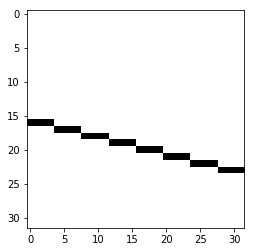

In [142]:
#plt.imshow(np.transpose(img1, (1, 0, 2))) #horiz_up
plt.imshow(img1) #vert_r
#plt.imshow(reflect_y(img1)) #vert_l
#plt.imshow(np.transpose(reflect_x(img1), (1, 0, 2))) #horis_down

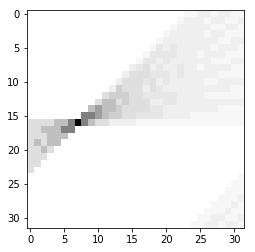

In [143]:
himg = FHT_vert_r(img1)
himg = normalize(himg)
plt.imshow(himg)

(16, 7)


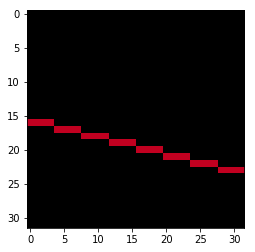

In [144]:
line = detector_min(himg)
print(line)
canvas = np.zeros((32, 32, 3), dtype=np.uint8)
canvas = draw_vert_r(canvas, line[0], line[1], (193, 0, 32))
plt.imshow(canvas)

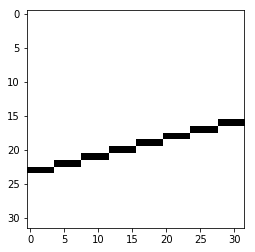

In [145]:
plt.imshow(img2)

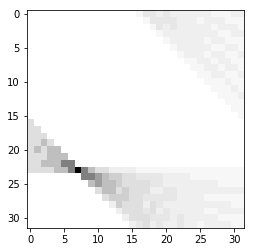

In [146]:
himg = FHT_vert_l(img2)
himg = normalize(himg)
plt.imshow(himg)

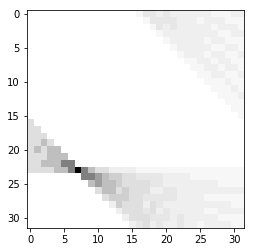

In [158]:
himg2 = reflect_x(FHT_vert_r(reflect_x(img2)))
plt.imshow(normalize(himg2))

(23, 7)


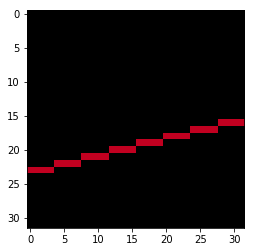

In [148]:
line = detector_min(himg)
print(line)
canvas = np.zeros((32, 32, 3), dtype=np.uint8)
canvas = draw_vert_l(canvas, line[0], line[1], (193, 0, 32))
plt.imshow(canvas)

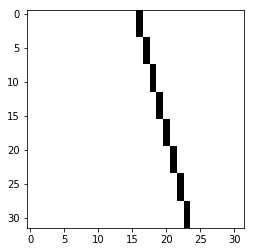

In [149]:
plt.imshow(img3)

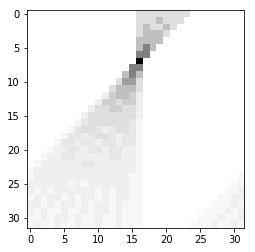

In [150]:
himg = FHT_horiz_up(img3)
himg = normalize(himg)
plt.imshow(himg)

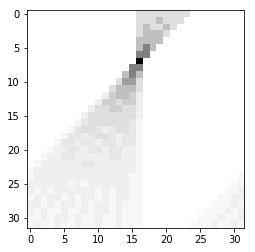

In [151]:
himg2 = np.transpose(FHT_vert_r(np.transpose(img3, (1, 0, 2))), (1, 0, 2))
himg2 = normalize(himg2)
plt.imshow(himg2)


(7, 16)


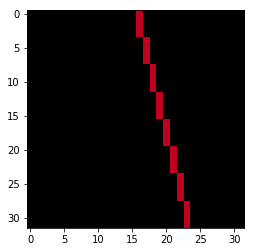

In [152]:
line = detector_min(himg)
print(line)
canvas = np.zeros((32, 32, 3), dtype=np.uint8)
canvas = draw_horiz_up(canvas, line[1], line[0], (193, 0, 32))
plt.imshow(canvas)

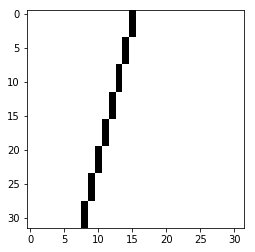

In [153]:
plt.imshow(img4)

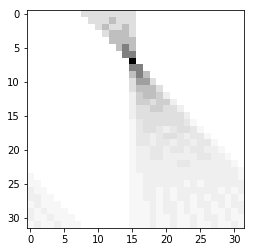

In [154]:
himg = FHT_horiz_dwn(img4)
himg = normalize(himg)
plt.imshow(himg)

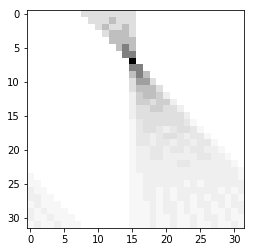

In [155]:
himg2 = reflect_y(np.transpose((FHT_vert_r(np.transpose(reflect_y(img4) ,(1, 0, 2)))), (1, 0, 2)))
himg2 = normalize(himg2)
plt.imshow(himg2)

(7, 15)


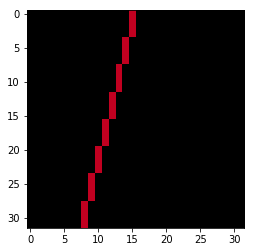

In [156]:
line = detector_min(himg)
print(line)
canvas = np.zeros((32, 32, 3), dtype=np.uint8)
canvas = draw_horiz_dwn(canvas, line[1], line[0], (193, 0, 32))
plt.imshow(canvas)